# Student Scores: Pre-Processing and Training

# Load Required Python Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


**Locate and print current working directory and parent directory.**

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/Student Scores/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/Student Scores


**Print contents of data/interim.**

In [3]:
os.listdir(parent+'/data/interim')

['total_student_scores_without_dummies.csv',
 'cleaned_student_scores.csv',
 'student_scores_no_outliers.csv',
 'student_scores_no_outliers.csv.csv',
 'total_student_scores_dummies.csv']

# Load Data

In [36]:
df = pd.read_csv(parent+'/data/interim/total_student_scores_without_dummies.csv',index_col=0)

In [37]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score,education,Grade
0,female,group B,bachelor's degree,standard,0,72.7,1,pass
1,female,group C,some college,standard,1,82.3,1,pass
2,female,group B,master's degree,standard,0,92.7,1,pass
3,male,group A,associate's degree,free/reduced,0,49.3,1,fail
4,male,group C,some college,standard,0,76.3,1,pass
5,female,group B,associate's degree,standard,0,77.3,1,pass
6,female,group B,some college,standard,1,91.7,1,pass
7,male,group B,some college,free/reduced,0,40.7,1,fail
8,male,group D,high school,free/reduced,1,65.0,0,fail
9,female,group B,high school,free/reduced,0,49.3,0,fail


In [38]:
df = df.astype({'gender':'category', 'race/ethnicity':'category','parental level of education':'category','lunch':'category','Grade':'category'})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       5000 non-null   category
 1   race/ethnicity               5000 non-null   category
 2   parental level of education  5000 non-null   category
 3   lunch                        5000 non-null   category
 4   test preparation course      5000 non-null   int64   
 5   mean score                   5000 non-null   float64 
 6   education                    5000 non-null   int64   
 7   Grade                        5000 non-null   category
dtypes: category(5), float64(1), int64(2)
memory usage: 181.3 KB


In [40]:
df.drop(['mean score'],axis=1,inplace=True)

In [58]:
X = df.drop('Grade', axis=1)
y = df['Grade']

# Create Dummy Variables

In [59]:
# One-hot encode categorical features
X = pd.get_dummies(X,drop_first=False)

# Pearson Correlation 
corr_dummies = X.corr(method='pearson')
corr_dummies.round(2).style.background_gradient(cmap='coolwarm')

,test preparation course,education,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard
test preparation course,1.000000,0.040000,-0.010000,0.010000,-0.000000,-0.010000,0.020000,-0.030000,0.020000,0.000000,0.010000,-0.040000,0.040000,0.010000,-0.010000,0.000000,-0.000000
education,0.040000,1.000000,0.030000,-0.030000,-0.010000,-0.020000,0.020000,-0.020000,0.030000,0.390000,0.290000,-0.630000,0.220000,0.430000,-0.610000,0.000000,-0.000000
gender_female,-0.010000,0.030000,1.000000,-1.000000,-0.020000,-0.000000,0.010000,-0.000000,0.000000,0.010000,0.040000,-0.020000,-0.010000,0.000000,-0.010000,-0.010000,0.010000
gender_male,0.010000,-0.030000,-1.000000,1.000000,0.020000,0.000000,-0.010000,0.000000,-0.000000,-0.010000,-0.040000,0.020000,0.010000,-0.000000,0.010000,0.010000,-0.010000
race/ethnicity_group A,-0.000000,-0.010000,-0.020000,0.020000,1.000000,-0.150000,-0.210000,-0.180000,-0.120000,-0.010000,0.010000,0.010000,-0.010000,-0.000000,0.000000,0.010000,-0.010000
race/ethnicity_group B,-0.010000,-0.020000,-0.000000,0.000000,-0.150000,1.000000,-0.340000,-0.290000,-0.200000,-0.000000,-0.010000,0.030000,0.010000,-0.020000,-0.000000,0.000000,-0.000000
race/ethnicity_group C,0.020000,0.020000,0.010000,-0.010000,-0.210000,-0.340000,1.000000,-0.410000,-0.280000,-0.000000,0.010000,-0.010000,-0.010000,0.020000,-0.010000,0.010000,-0.010000
race/ethnicity_group D,-0.030000,-0.020000,-0.000000,0.000000,-0.180000,-0.290000,-0.410000,1.000000,-0.240000,-0.000000,-0.020000,-0.000000,0.010000,-0.010000,0.030000,-0.010000,0.010000
race/ethnicity_group E,0.020000,0.030000,0.000000,-0.000000,-0.120000,-0.200000,-0.280000,-0.240000,1.000000,0.010000,0.010000,-0.010000,-0.000000,0.010000,-0.020000,-0.010000,0.010000
parental level of education_associate's degree,0.000000,0.390000,0.010000,-0.010000,-0.010000,-0.000000,-0.000000,-0.000000,0.010000,1.000000,-0.180000,-0.240000,-0.140000,-0.270000,-0.230000,-0.000000,0.000000


In [43]:
print(df.shape)
X.head()

(5000, 7)


,test preparation course,education,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard
0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [44]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,5000.0,0.3422,0.474494,0.0,0.0,0.0,1.0,1.0
education,5000.0,0.6168,0.486215,0.0,0.0,1.0,1.0,1.0
gender_female,5000.0,0.5024,0.500044,0.0,0.0,1.0,1.0,1.0
gender_male,5000.0,0.4976,0.500044,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group A,5000.0,0.0828,0.275607,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group B,5000.0,0.1952,0.396394,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group C,5000.0,0.3190,0.466136,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group D,5000.0,0.2620,0.439767,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group E,5000.0,0.1410,0.348056,0.0,0.0,0.0,0.0,1.0
parental level of education_associate's degree,5000.0,0.1938,0.395314,0.0,0.0,0.0,0.0,1.0


In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   test preparation course                         5000 non-null   int64
 1   education                                       5000 non-null   int64
 2   gender_female                                   5000 non-null   uint8
 3   gender_male                                     5000 non-null   uint8
 4   race/ethnicity_group A                          5000 non-null   uint8
 5   race/ethnicity_group B                          5000 non-null   uint8
 6   race/ethnicity_group C                          5000 non-null   uint8
 7   race/ethnicity_group D                          5000 non-null   uint8
 8   race/ethnicity_group E                          5000 non-null   uint8
 9   parental level of education_associate's degree  5000 non-null   

## Save DataFrame with Dummies

In [46]:
X.to_csv(parent+'/data/interim/total_student_scores_dummies.csv')

# Split into Train and Test Data

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [85]:
# examine data details
X.describe().T

,count,mean,std,min,25%,50%,75%,max
test preparation course,5000.0,0.3422,0.474494,0.0,0.0,0.0,1.0,1.0
education,5000.0,0.6168,0.486215,0.0,0.0,1.0,1.0,1.0
gender_female,5000.0,0.5024,0.500044,0.0,0.0,1.0,1.0,1.0
gender_male,5000.0,0.4976,0.500044,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group A,5000.0,0.0828,0.275607,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group B,5000.0,0.1952,0.396394,0.0,0.0,0.0,0.0,1.0
race/ethnicity_group C,5000.0,0.3190,0.466136,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group D,5000.0,0.2620,0.439767,0.0,0.0,0.0,1.0,1.0
race/ethnicity_group E,5000.0,0.1410,0.348056,0.0,0.0,0.0,0.0,1.0
parental level of education_associate's degree,5000.0,0.1938,0.395314,0.0,0.0,0.0,0.0,1.0


# DO NOT DO for this dataset because it is made up of One Hot Encoded features: Standardize the Magnitude of Numeric Features Using a Scaler

In [86]:
# This is here for future reference of how to perform scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Make scaler object
scaler = preprocessing.StandardScaler()

# Fit training data to scaler object
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [87]:
X_test.head()

,test preparation course,education,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard
1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
489,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
891,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
513,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1
553,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0


# Model

In [88]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [89]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.682


In [90]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

test preparation course                           0.202993
lunch_free/reduced                                0.120020
lunch_standard                                    0.112614
race/ethnicity_group E                            0.073223
education                                         0.058580
parental level of education_master's degree       0.047974
race/ethnicity_group B                            0.044922
gender_female                                     0.040332
race/ethnicity_group C                            0.040220
gender_male                                       0.040016
race/ethnicity_group D                            0.039966
race/ethnicity_group A                            0.038198
parental level of education_some college          0.032120
parental level of education_some high school      0.030497
parental level of education_bachelor's degree     0.029467
parental level of education_associate's degree    0.028686
parental level of education_high school           0.0201

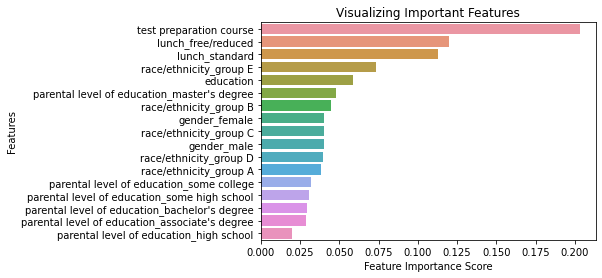

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint

In [66]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [67]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.25816382808581445,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.03850933822612032,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [69]:
# generate predictions using the best-performing model
predictions = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.674
